In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [4]:
from runner import Runner

In [15]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp2hpfz0zvGP2
Verbose mode active!


In [5]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [9]:
print(masks.shape)
print(images.shape)

(12311, 512, 512, 1)
(12311, 512, 512, 1)


In [10]:
print(masks.dtype)
print(images.dtype)

bool
float32


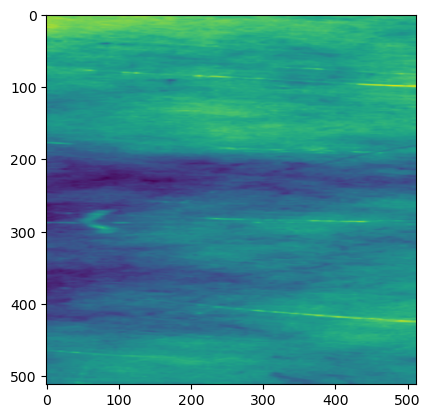

In [11]:
imshow(images[99])

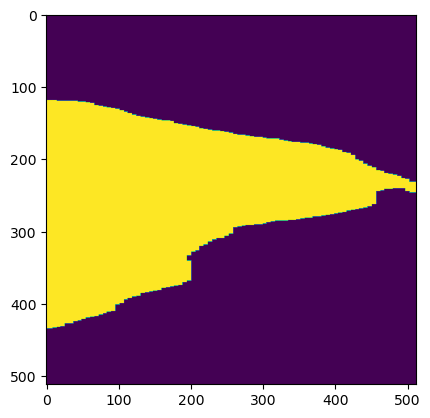

In [12]:
imshow(masks[99])

In [13]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [16]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)

Weights OK!


In [17]:
RUNS = 5

In [18]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
10/10 [==============================] - 39s 3s/step - loss: 1.1403 - dice_coeff: 0.4538 - val_loss: 1.3216 - val_dice_coeff: 0.3629
Epoch 2/100
10/10 [==============================] - 14s 2s/step - loss: 0.9447 - dice_coeff: 0.5290 - val_loss: 1.3186 - val_dice_coeff: 0.3607
Epoch 3/100
10/10 [==============================] - 14s 1s/step - loss: 0.8484 - dice_coeff: 0.5713 - val_loss: 1.3149 - val_dice_coeff: 0.3584
Epoch 4/100
10/10 [==============================] - 14s 1s/step - loss: 0.7907 - dice_coeff: 0.5981 - val_loss: 1.3120 - val_dice_coeff: 0.3552
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: 0.7644 - dice_coeff: 0.6107 - val_loss: 1.3087 - val_dice_coeff: 0.3527
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 0.7234 - dice_coeff: 0.6257 - val_loss: 1.3061 - val_dice_coeff: 0.3505
Epoch 7/100
10/10 [==============================] - 15s 2s/step - loss: 0.6955 - dice_coeff: 0.6397 - val_loss: 1.3025

Replacing 119 from 358 !
D_relabeled_ 119
selected_ids ['8bbb5f04-245d-44c9-b1d9-d1c91441bebe', 'ae950766-06d4-4762-9825-393c355adf38', 'f351a242-b33e-4c9c-934c-9c477d685b1a', '35c43e24-c4d3-44e4-ab1a-357766218cba', '6add6498-c1e9-46aa-ad5c-50e03cdecd2f', 'e755337f-9d60-4874-b1f1-561d5a550984', '8544f4e9-f9b0-456b-a29c-e18b10c5fde0', '877c9b79-acde-4198-b164-cabef0f5e7c2', '6fb0087e-d73b-4d39-bbab-b47b91f19aba', '910d2641-5b0c-4c64-b12c-512266ebdb4e', '8847caf3-fd56-4bad-ab68-783bcb9292bb', 'fb7ca371-6755-4d10-ab6e-19e698120a16', 'dfd457d1-975d-4139-99d4-09169ebd6ccf', 'c8ca2d11-c9dd-4a9c-89aa-05befcd8e3b7', 'e31e6b2b-5cc0-4cc2-85ab-4f52822e5176', '8ca93d82-1593-401e-a2be-f5c5901354fa', '5d9b86af-c34e-477e-abd4-2b8ad5c26ede', '97e8defa-7270-4363-ad0b-900d49e75758', '71cc5c1b-680f-4b54-b0aa-194125f242d1', 'a825b389-12ac-4086-9cf4-5e7fe4ad03b2', 'b789dcd1-9a16-41d0-9f84-a502e37efc11', 'bd7e3aa8-1e09-4939-8636-738ef55ff696', 'e83829f0-cdd6-4df2-9f37-21e25d7b98e7', '577caade-ce62-44c4-b656

Removed: 119 Filled: 119
TOOK 858.5706398487091 seconds
***
RUN: 1
Epoch 1/100
12/12 [==============================] - 22s 2s/step - loss: 0.5013 - dice_coeff: 0.7320 - val_loss: 1.1183 - val_dice_coeff: 0.3880
Epoch 2/100
12/12 [==============================] - 16s 1s/step - loss: 0.4738 - dice_coeff: 0.7406 - val_loss: 0.8599 - val_dice_coeff: 0.5468
Epoch 3/100
12/12 [==============================] - 16s 1s/step - loss: 0.4701 - dice_coeff: 0.7466 - val_loss: 0.8436 - val_dice_coeff: 0.5749
Epoch 4/100
12/12 [==============================] - 16s 1s/step - loss: 0.4631 - dice_coeff: 0.7522 - val_loss: 0.8092 - val_dice_coeff: 0.5707
Epoch 5/100
12/12 [==============================] - 17s 1s/step - loss: 0.4473 - dice_coeff: 0.7549 - val_loss: 0.7935 - val_dice_coeff: 0.6017
Epoch 6/100
12/12 [==============================] - 17s 1s/step - loss: 0.4390 - dice_coeff: 0.7620 - val_loss: 0.8024 - val_dice_coeff: 0.5800
Epoch 7/100
12/12 [==============================] - 16s 1s/ste

Replacing 127 from 383 !
D_relabeled_ 127
selected_ids ['14e9e807-0fb5-4438-8d83-4ccbdbda4fcc', 'cd9e5d35-7b81-4c3f-a586-3f3805bd3bd6', 'e3bc6015-1415-4592-b0d5-1ba56450a262', 'a70b24e4-ecb6-4ef8-849e-e5b69f6b6c67', '9b74c804-2208-4242-8931-8863f12e19bd', 'bcccc4ad-2642-4b08-bcb1-ba8440e90dd3', 'eba47b8c-158d-43d6-8093-f7776c8b6758', '87a90d6e-1db3-42cb-8ef3-0997196f5c33', '6212331f-9190-47c7-9c65-0515fd5ac670', 'f15fbcec-0671-43b2-b735-69edfbd9a951', '174967b7-05fe-44e5-922a-bd2779754974', '479c1242-5519-4e8e-b25c-a400af6739ca', '3f79e068-c57e-4c7b-af43-fb2fc9bea720', '867852e6-1843-4ac3-8c31-16c367bc6981', 'c7298e83-b46c-42cd-afe6-7263d64c8dff', '02844daa-6746-41f2-a1cc-6eadc2a5d3af', '14facfa1-d9b5-4ba0-95ae-9b3b99eee3e3', '7da39003-1bfa-44d5-8f56-9be900c2bc82', '440250da-c948-434a-9e90-fa94b15169d8', '95f4d933-3631-4fca-8e28-d12141148ab0', 'a63f4ced-1219-4d17-a7d6-9eea22900bc2', 'cf64412a-fe59-41a3-8758-fb60a6303bda', '97d21ae0-5c25-4911-85d4-5071d3a47f8c', '9c6afd58-ddfd-4033-a0db

Epoch 1/100
14/14 [==============================] - 24s 2s/step - loss: 0.3839 - dice_coeff: 0.7949 - val_loss: 0.5699 - val_dice_coeff: 0.7391
Epoch 2/100
14/14 [==============================] - 18s 1s/step - loss: 0.3530 - dice_coeff: 0.8071 - val_loss: 0.5018 - val_dice_coeff: 0.7513
Epoch 3/100
14/14 [==============================] - 18s 1s/step - loss: 0.3556 - dice_coeff: 0.8053 - val_loss: 0.5225 - val_dice_coeff: 0.7406
Epoch 4/100
14/14 [==============================] - 18s 1s/step - loss: 0.3411 - dice_coeff: 0.8114 - val_loss: 0.5216 - val_dice_coeff: 0.7589
Epoch 5/100
14/14 [==============================] - 18s 1s/step - loss: 0.3264 - dice_coeff: 0.8199 - val_loss: 0.6239 - val_dice_coeff: 0.7244
Epoch 6/100
14/14 [==============================] - 18s 1s/step - loss: 0.3278 - dice_coeff: 0.8206 - val_loss: 0.5326 - val_dice_coeff: 0.7548
Epoch 7/100
14/14 [==============================] - 18s 1s/step - loss: 0.3231 - dice_coeff: 0.8222 - val_loss: 0.5590 - val_dice

Replacing 121 from 364 !
D_relabeled_ 121
selected_ids ['4939a043-0601-4204-ba16-f993b9a484da', '604c9ebe-594d-4f5c-b8d0-b36e096baa1d', '122b6233-ba02-4f2a-934b-89296b5ca763', 'd45d0c21-4ff3-42aa-9a18-971cfa256aeb', '2ce5dc6c-0213-4f36-9fe7-5db4c0f36eb3', '08194a7c-116f-47ce-ae6f-e080a7992b83', 'c9af198a-c1a8-44dd-a38a-d4fa3a5b2ad6', '01944e68-3123-4571-90cb-bb78fad3edc7', 'ed4ab08d-ffb6-4876-bc0c-cb4a68da10ef', '5c7993dc-e377-4a93-9259-2cb3f4dd6eb3', '4b72cff6-9631-4484-a074-093317b57954', '9e065040-387d-439a-afc1-4e16a3f61c62', '6e677e93-978b-4342-a24d-7761bb76de2a', '2c2866cf-2981-4acd-81e5-b6ec644e2be0', 'ef085041-3e9a-46a0-9cc3-b6abb0cd0e45', 'da38bddf-b6f1-4d5c-b4a4-c8e91ebac1c1', '64eb322d-8840-4d08-9d23-7e4cb82e32d7', 'c796ba12-addb-455f-9d3e-6a539ac5132b', 'd6b5d0ff-17a7-4256-81eb-794b98b9b554', 'e7f8a589-b920-48c6-8f4b-8b8167acbd2e', '1d2b4c88-be31-433a-afd8-10afa58d5c43', '036be939-4969-4cdf-b705-989d453f01a3', 'e3cd9704-4d5d-4241-881c-93c359d17ea2', '2ee9ab77-2795-4526-bc27

Epoch 1/100
16/16 [==============================] - 25s 2s/step - loss: 0.2842 - dice_coeff: 0.8487 - val_loss: 0.5722 - val_dice_coeff: 0.7673
Epoch 2/100
16/16 [==============================] - 20s 1s/step - loss: 0.2560 - dice_coeff: 0.8588 - val_loss: 0.4522 - val_dice_coeff: 0.7866
Epoch 3/100
16/16 [==============================] - 20s 1s/step - loss: 0.2449 - dice_coeff: 0.8628 - val_loss: 0.4709 - val_dice_coeff: 0.7860
Epoch 4/100
16/16 [==============================] - 20s 1s/step - loss: 0.2400 - dice_coeff: 0.8660 - val_loss: 0.4806 - val_dice_coeff: 0.7828
Epoch 5/100
16/16 [==============================] - 20s 1s/step - loss: 0.2304 - dice_coeff: 0.8690 - val_loss: 0.4744 - val_dice_coeff: 0.7734
Epoch 6/100
16/16 [==============================] - 20s 1s/step - loss: 0.2352 - dice_coeff: 0.8672 - val_loss: 0.4671 - val_dice_coeff: 0.7902
Epoch 7/100
16/16 [==============================] - 20s 1s/step - loss: 0.2193 - dice_coeff: 0.8742 - val_loss: 0.4901 - val_dice

Replacing 130 from 391 !
D_relabeled_ 130
selected_ids ['f085fdbe-f278-4e1a-88a5-532610466b0e', '67d5b3ef-65a7-41d7-914b-865c0f2b80de', 'e636dbd1-18e9-488f-a638-16887d3658d4', '24197f84-d115-4c8a-845d-fb02b3bb27a9', 'f590ac1c-da2a-462b-9df7-d562e61ae09c', '9552b4ec-e4cf-4cc5-9741-c64019a2f8f9', '26c7d440-ef99-4993-b0c5-c55f9f3d6b28', '7fd348d7-473e-4cf9-9957-ab70afd77244', 'db0fbcc1-c1d7-4493-9ace-5144f45ee482', '921913fa-bab6-4af7-9d4e-74fdee216a30', '59f4412e-3a3f-4b79-b776-c419c7d7c9ec', '1971bd2b-f0f1-4327-8fa4-59e8357b246d', 'f039decf-8433-4c16-a0b2-b64e5d9ab117', '66859b28-1cd5-4058-b677-0ada4bf15ad5', 'e1dce971-6afd-487d-8463-eeb2b69365e2', 'b71ca447-835c-4335-9c75-593b981ba96f', 'd7b9202d-50ec-4504-886a-911fa231205b', 'e5998090-7000-43f9-a96e-5d30550b6d52', 'cbed661a-bc6c-4ea6-9150-b73b02389392', 'ba902c79-220d-432b-9dfb-1a17e1e8fe00', '5186ca51-2dda-4fc5-bb3c-e09e3460a5a2', 'a138cf99-70f1-41c3-9b5b-4db72b6c06b0', '32453ba0-b1df-4250-a956-fda01b35384d', '3d2fc2b0-219f-4f37-9e7f

Epoch 1/100
18/18 [==============================] - 27s 2s/step - loss: 0.2510 - dice_coeff: 0.8687 - val_loss: 0.4605 - val_dice_coeff: 0.8014
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.2125 - dice_coeff: 0.8811 - val_loss: 0.5734 - val_dice_coeff: 0.7737
Epoch 3/100
18/18 [==============================] - 21s 1s/step - loss: 0.2121 - dice_coeff: 0.8798 - val_loss: 0.8370 - val_dice_coeff: 0.7210
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.2016 - dice_coeff: 0.8865 - val_loss: 0.4654 - val_dice_coeff: 0.7906
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1909 - dice_coeff: 0.8920 - val_loss: 0.4428 - val_dice_coeff: 0.7984
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1855 - dice_coeff: 0.8938 - val_loss: 0.4355 - val_dice_coeff: 0.7962
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.1849 - dice_coeff: 0.8954 - val_loss: 0.4520 - val_dice

Replacing 123 from 369 !
D_relabeled_ 123
selected_ids ['1bc2b560-aa3b-4034-a6e2-3161830d70a6', '08515f7f-81ae-43fb-bae7-16ce43ce9375', 'f973156e-7d2d-4760-9b78-c1a7e91e70e5', '19cbfb5f-0623-48e5-af79-91f33e51f9e5', '554a317e-cc62-4540-a559-953898a3cce4', 'ea8eb173-e60f-43ea-9a2d-d047c572a345', 'd23298cc-11df-40b8-b45b-16a6fdfbe381', 'a5a7d76f-7f5a-417e-af72-a04b99057f03', 'e5240909-eeab-48d3-8469-f3d6428e8674', '37656f7c-d70d-452c-8700-316aa81167d7', 'dcf7dc3a-25ef-48a5-a762-f0fb0ebedd63', '75e65f5e-53bb-4fa9-beb8-8afcc5cc1352', '72db10a5-8dcc-46e7-919e-cf0865ab2d98', '163d4366-75b2-4d28-ad13-4f4169704b69', '51b8244e-7c4b-4602-8234-8d7743e939f1', 'b89169c3-dfe3-4844-9912-4bbf683b4d6f', 'd6dd820d-b51e-48a4-8f24-b3db90d33c06', '01e1a3ae-773a-4bc7-a2cd-60d1f03e2b33', 'b3ff8312-6cd7-4ce1-b3da-65cb821ac0bd', 'f6b9cb23-0f9d-4227-a4da-e9a35877affb', 'fe9cba66-f25b-4fb5-8b0a-726da1e5119a', '80f2d985-0e21-4dc5-bef5-dced6c25ee7f', '84378afb-f8db-4a5b-9f6b-585a4814c2a4', 'dd75b733-e401-4d93-ae1f

In [19]:
R.classifier_scores

[[1.3241195678710938, 0.28284069895744324],
 [0.5464446544647217, 0.733994722366333],
 [0.48959091305732727, 0.7793927192687988],
 [0.5060698390007019, 0.7721649408340454],
 [0.46330758929252625, 0.7989636063575745]]

In [20]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

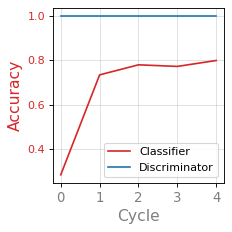

In [21]:
R.plot()